In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing

from sklearn.metrics import roc_auc_score

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn import preprocessing

#load data
X = pd.read_csv('/content/sph_dynamic.csv')
Y=pd.read_csv(r"/content/sph_static.csv")
Y_total=pd.read_csv(r"/content/sph_static_final.csv")
'''
X.head()
len(X)
X.isna().sum()
'''
drop_column = ['total_protein','heart_rate','sbp','dbp','mbp','resp_rate','temperature','bilirubin_direct','bilirubin_indirect',
              'ph','lactate','urineoutput','sofa_respiration','sofa_coagulation','sofa_liver','sofa_cardiovascular','sofa_cns',
              'sofa_renal']
drop_column1=['icu_intime','vent_start','vent_end']
new_dynmaic = X.drop(columns = drop_column)
new_dynmaic.head()


#data merge
Xset=new_dynmaic.groupby('stay_id').mean()
Yset=Y_total.drop(columns=drop_column1)
data0=pd.merge(Xset,Yset,on='stay_id')

#difinite features and target
target=pd.DataFrame(data0['vent_duration'])
target6=pd.DataFrame(data0['vent_duration_group_in_hours_3_day'])
targetd=pd.DataFrame(data0['vent_duration_group_in_days'])
features=data0.drop(columns=['vent_duration','stay_id','vent_duration_group_in_days','vent_duration_group_in_hours_3_day'])


#impute and scale
Xc=features.columns

imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
#features=imputer.fit_transform(features)
features =features.fillna(features.mean())
features=pd.DataFrame(preprocessing.normalize(features))

target=target.fillna(target.mean())

#features= pd.DataFrame(KNN(k=6).fit_transform(features)) 
features.columns=Xc

#split dataset
trainX, testX, trainY, testY = train_test_split(features, target, random_state=3, test_size=0.2)
trainX6, testX6, trainY6, testY6 = train_test_split(features, target6, random_state=3, test_size=0.2)
trainXd, testXd, trainYd, testYd = train_test_split(features, targetd, random_state=3, test_size=0.2)


#build up the model
models = {
    "linear":LinearRegression(),
    "dtr": DecisionTreeRegressor(),
    "rfr": RandomForestRegressor(),
    "svr": SVR(),
    "xgbr": xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01, max_depth=2)
}



<ipython-input-1-3f8ece99fb5b>:42: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Xset=new_dynmaic.groupby('stay_id').mean()


In [ ]:
drop_column = ['total_protein','heart_rate','sbp','dbp','mbp','resp_rate','temperature','bilirubin_direct','bilirubin_indirect',
              'ph','lactate','urineoutput','sofa_respiration','sofa_coagulation','sofa_liver','sofa_cardiovascular','sofa_cns',
              'sofa_renal']
for i in drop_column:
    heart=X[['stay_id',i]]
    heart_new=heart.groupby('stay_id').mean()
    print(len(Yset)-heart_new.isna().sum())

total_protein    79
dtype: int64
heart_rate    183
dtype: int64
sbp    125
dtype: int64
dbp    125
dtype: int64
mbp    132
dtype: int64
resp_rate    184
dtype: int64
temperature    48
dtype: int64
bilirubin_direct    134
dtype: int64
bilirubin_indirect    134
dtype: int64
ph    20
dtype: int64
lactate    12
dtype: int64
urineoutput    79
dtype: int64
sofa_respiration    17
dtype: int64
sofa_coagulation    1
dtype: int64
sofa_liver    1
dtype: int64
sofa_cardiovascular    147
dtype: int64
sofa_cns    44
dtype: int64
sofa_renal    0
dtype: int64


In [ ]:
heart1=X[['stay_id','heart_rate','resp_rate']]


In [ ]:
#consider to add heart_rate and resp_rate in (which has medical relation with inbutation time)
heart_res=heart1.dropna()
#heart_res.head()
#heart_res.info()
data2=pd.merge(data0,heart_res,on='stay_id')
target_new=pd.DataFrame(data2['vent_duration'])
target_new6=pd.DataFrame(data2['vent_duration_group_in_hours_3_day'])
target_newd=pd.DataFrame(data2['vent_duration_group_in_days'])
#features_new=pd.DataFrame(data2['calcium','creatinine','glucose','sodium','chloride','hemoglobin','wbc','alt','ast','alp','bilirubin_total','pt','heart_rate','resp_rate'])
features_new= data2.drop(columns=['vent_duration','stay_id','vent_duration_group_in_days','vent_duration_group_in_hours_3_day'])
features_new.info()

#impute
Xc1=features_new.columns

imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
#features_new=imputer.fit_transform(features_new) 

features_new =features_new.fillna(features_new.mean())
features_new=pd.DataFrame(preprocessing.normalize(features_new))
features_new.columns=Xc1
features_new.info()
#split dataset
trainX_new, testX_new, trainY_new, testY_new = train_test_split(features_new, target_new, random_state=3, test_size=0.2)
trainX_new6, testX_new6, trainY_new6, testY_new6 = train_test_split(features_new, target_new6, random_state=3, test_size=0.2)
trainX_newd, testX_newd, trainY_newd, testY_newd = train_test_split(features_new, target_newd, random_state=3, test_size=0.2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   calcium          174 non-null    float64
 1   creatinine       184 non-null    float64
 2   glucose          182 non-null    float64
 3   sodium           184 non-null    float64
 4   chloride         185 non-null    float64
 5   hemoglobin       176 non-null    float64
 6   wbc              177 non-null    float64
 7   alt              122 non-null    float64
 8   ast              122 non-null    float64
 9   alp              120 non-null    float64
 10  bilirubin_total  122 non-null    float64
 11  pt               158 non-null    float64
 12  heart_rate       185 non-null    float64
 13  resp_rate        185 non-null    float64
dtypes: float64(14)
memory usage: 21.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 14 columns):
 #   Column 

the RMSE is:
53.394078620203004


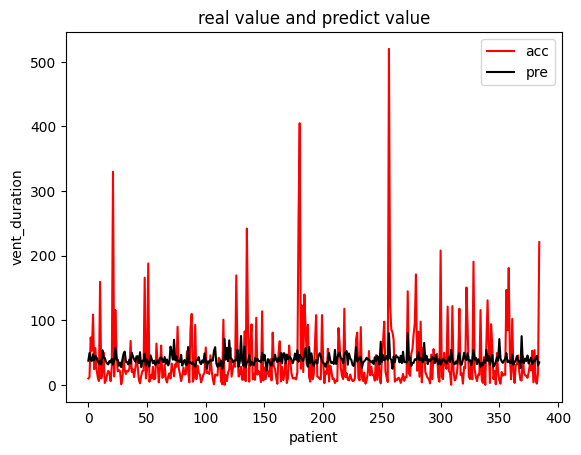

In [ ]:
#LinearRegression G1
model = models['linear']
model.fit(trainX, trainY)
y_pred = model.predict(testX)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY, y_pred))) 

import matplotlib.pyplot as plt  

testY.reset_index(drop=True, inplace=True)

plt.plot(testY,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(testY, y_pred))

# Calculate R-squared
r2 = r2_score(testY, y_pred)

# Calculate MAE
mae = mean_absolute_error(testY, y_pred)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAE:", mae)

RMSE: 53.394078620203004
R-squared: 0.027395032305241873
MAE: 33.834553838483004


the RMSE is:
4.069834225047138


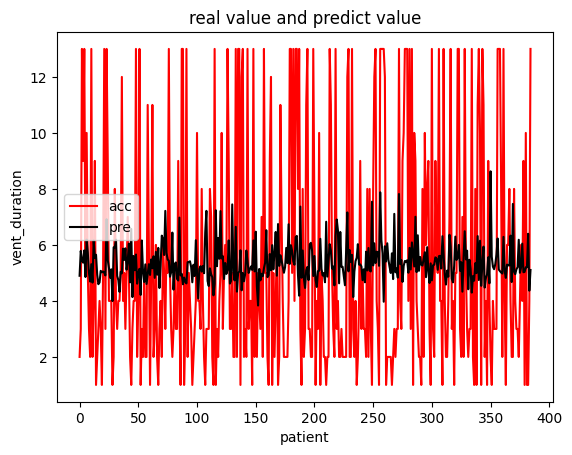

In [ ]:
#LinearRegression 6 hr G2
model = models['linear']
model.fit(trainX6, trainY6)
y_pred6 = model.predict(testX6)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY6, y_pred6))) 

import matplotlib.pyplot as plt  

testY6.reset_index(drop=True, inplace=True)

plt.plot(testY6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(testY6, y_pred6))

# Calculate R-squared
r2 = r2_score(testY6, y_pred6)

# Calculate MAE
mae = mean_absolute_error(testY6, y_pred6)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAE:", mae)

RMSE: 4.069834225047138
R-squared: 0.009577618485093198
MAE: 3.397719108754297


the RMSE is:
1.107809415618202


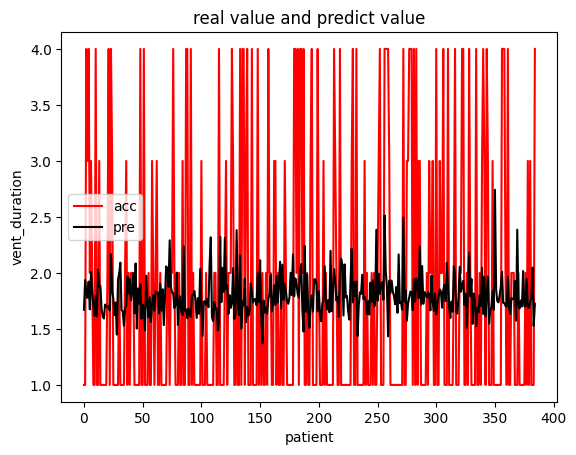

In [ ]:
#LinearRegression d G3
model = models['linear']
model.fit(trainXd, trainYd)
y_pred_d = model.predict(testXd)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testYd, y_pred_d))) 

import matplotlib.pyplot as plt  

testYd.reset_index(drop=True, inplace=True)

plt.plot(testYd,color="r",label="acc") 
 
plt.plot(y_pred_d,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Calculate RMSE
rmse = np.sqrt(metrics.mean_squared_error(testYd, y_pred_d))

# Calculate R-squared
r2 = r2_score(testYd, y_pred_d)

# Calculate MAE
mae = mean_absolute_error(testYd, y_pred_d)

print("RMSE:", rmse)
print("R-squared:", r2)
print("MAE:", mae)

RMSE: 1.107809415618202
R-squared: 0.01605453828519432
MAE: 0.9332708025674645


the RMSE is:
65.561369877337


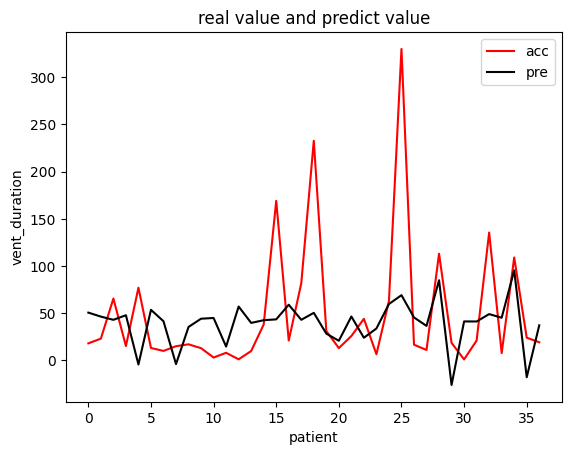

In [ ]:
#LinearRegression (add the heart_rate and resp_rate) G4
model = models['linear']
model.fit(trainX_new, trainY_new)
y_pred = model.predict(testX_new)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_new, y_pred))) 

import matplotlib.pyplot as plt  

testY_new.reset_index(drop=True, inplace=True)

plt.plot(testY_new,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
4.440568101006284


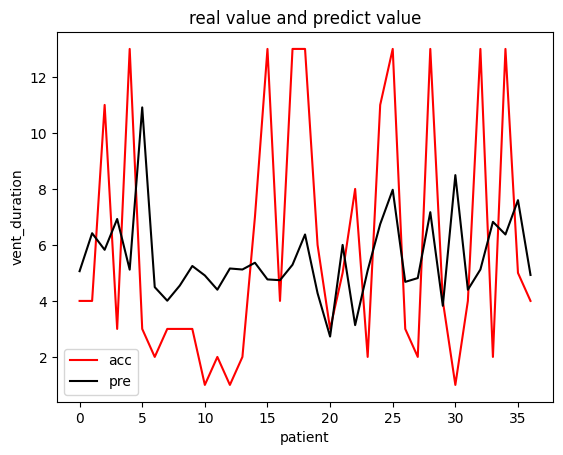

In [ ]:
#LinearRegression (add the heart_rate and resp_rate) 6-hours G5
model = models['linear']
model.fit(trainX_new6, trainY_new6)
y_pred6 = model.predict(testX_new6)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_new6, y_pred6))) 

import matplotlib.pyplot as plt  

testY_new6.reset_index(drop=True, inplace=True)

plt.plot(testY_new6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
1.239034232276347


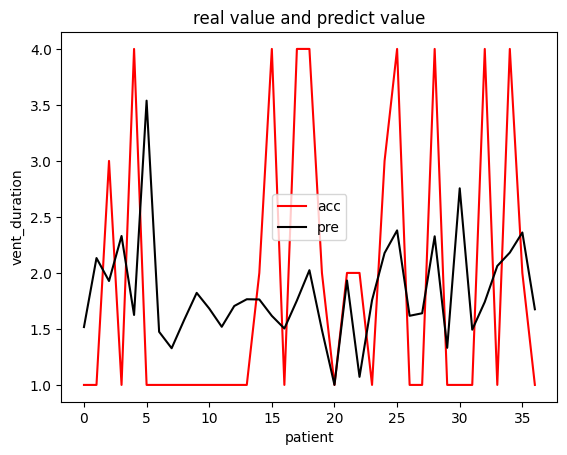

In [ ]:
#LinearRegression (add the heart_rate and resp_rate) G6
model = models['linear']
model.fit(trainX_newd, trainY_newd)
y_predd = model.predict(testX_newd)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_newd, y_predd))) 

import matplotlib.pyplot as plt  

testY_newd.reset_index(drop=True, inplace=True)

plt.plot(testY_newd,color="r",label="acc") 
 
plt.plot(y_predd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
85.62993566718853


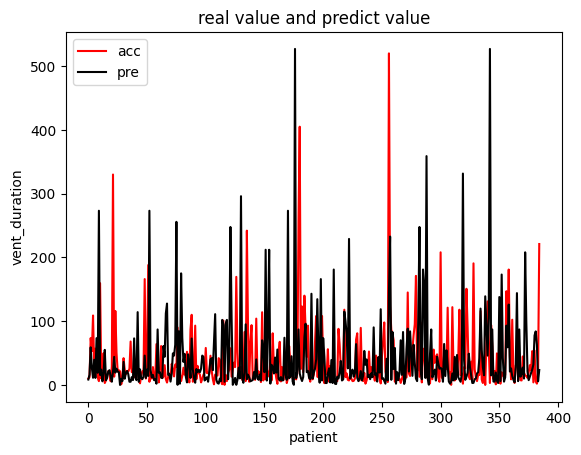

In [ ]:
#DecisionTreeRegressor G1
model = models['dtr']
model.fit(trainX, trainY)
y_pred = model.predict(testX)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY, y_pred))) 

import matplotlib.pyplot as plt  

testY.reset_index(drop=True, inplace=True)

plt.plot(testY,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
5.538296423335182


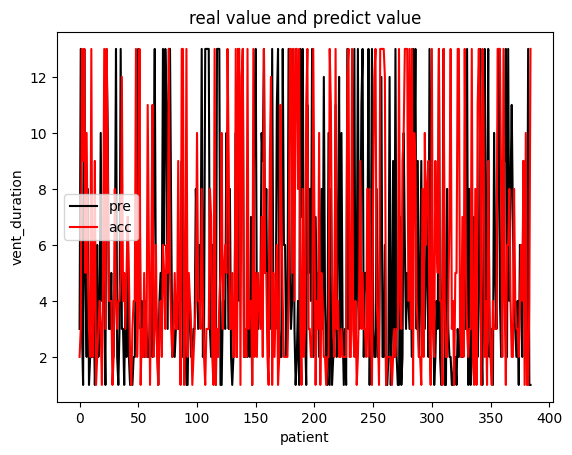

In [ ]:
#DecisionTreeRegressor 6 hr G2
model = models['dtr']
model.fit(trainX6, trainY6)
y_pred6 = model.predict(testX6)
y_pred6=np.clip(y_pred6,a_min=1,a_max=13)

from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY6, y_pred6))) 

import matplotlib.pyplot as plt  

testY6.reset_index(drop=True, inplace=True)

plt.plot(y_pred6,color=(0,0,0),label="pre")
plt.plot(testY6,color="r",label="acc") 
 
 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
1.5289415743128767


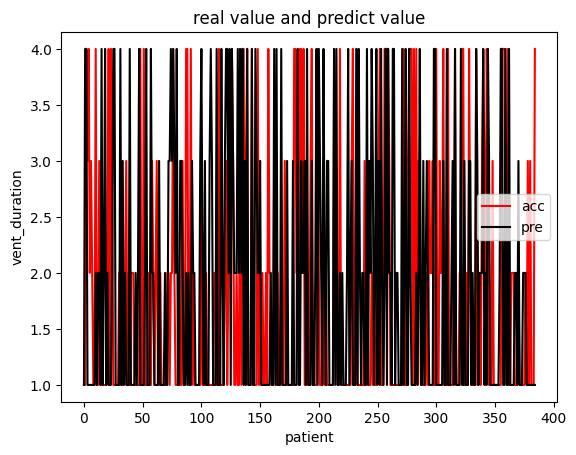

In [ ]:
#DecisionTreeRegressor d G3
model = models['dtr']
model.fit(trainXd, trainYd)
y_pred_d = model.predict(testXd)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testYd, y_pred_d))) 

import matplotlib.pyplot as plt  

testYd.reset_index(drop=True, inplace=True)

plt.plot(testYd,color="r",label="acc") 
 
plt.plot(y_pred_d,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
74.24430590639369


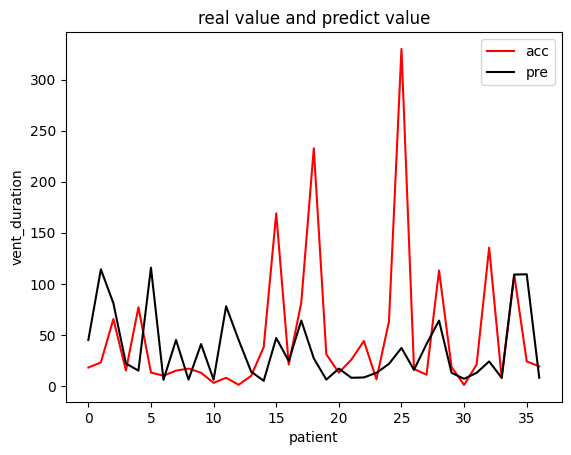

In [ ]:
#Decisiontree Regression(add heart_rate and resp_rate) G4
model = models['dtr']
model.fit(trainX_new, trainY_new)
y_pred = model.predict(testX_new)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_new, y_pred))) 

import matplotlib.pyplot as plt  

testY_new.reset_index(drop=True, inplace=True)

plt.plot(testY_new,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
5.032327922972064


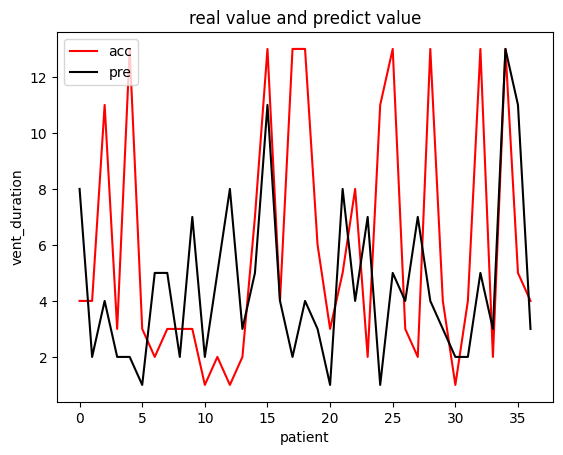

In [ ]:
#Decisiontree Regression(add heart_rate and resp_rate) 6 G5
model = models['dtr']
model.fit(trainX_new6, trainY_new6)
y_pred6 = model.predict(testX_new6)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_new6, y_pred6))) 

import matplotlib.pyplot as plt  

testY_new6.reset_index(drop=True, inplace=True)

plt.plot(testY_new6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
1.239034232276347


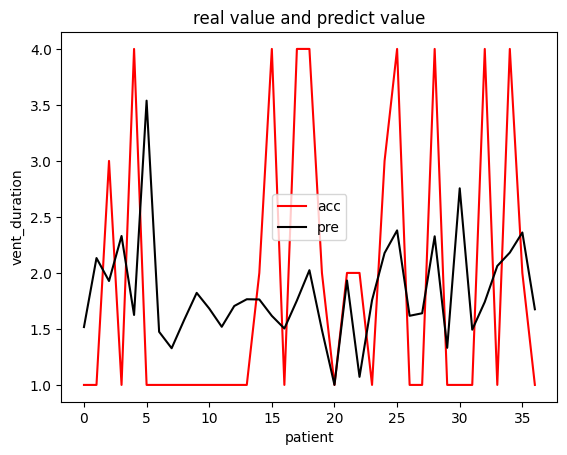

In [ ]:
#Decisiontree Regression(add heart_rate and resp_rate) d G6
model = models['dtr']
model.fit(trainX_newd, trainY_newd)
y_pred = model.predict(testX_newd)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_newd, y_predd))) 

import matplotlib.pyplot as plt  

testY_newd.reset_index(drop=True, inplace=True)

plt.plot(testY_newd,color="r",label="acc") 
 
plt.plot(y_predd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
54.843572014226574


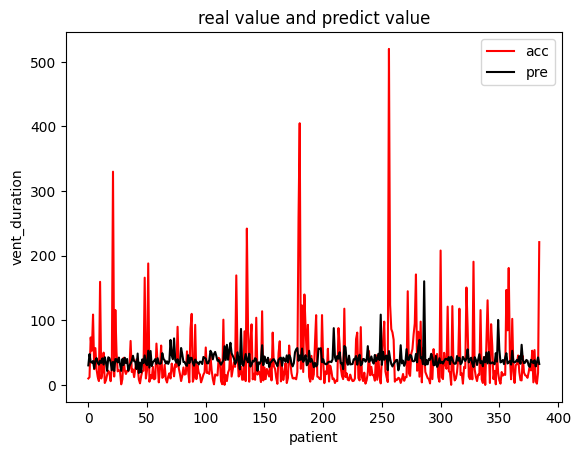

In [ ]:
#Xgboost Regression G1
model = models['xgbr']
model.fit(trainX, trainY)
y_pred = model.predict(testX)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY, y_pred))) 

import matplotlib.pyplot as plt  

testY.reset_index(drop=True, inplace=True)

plt.plot(testY,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
4.126735862005872


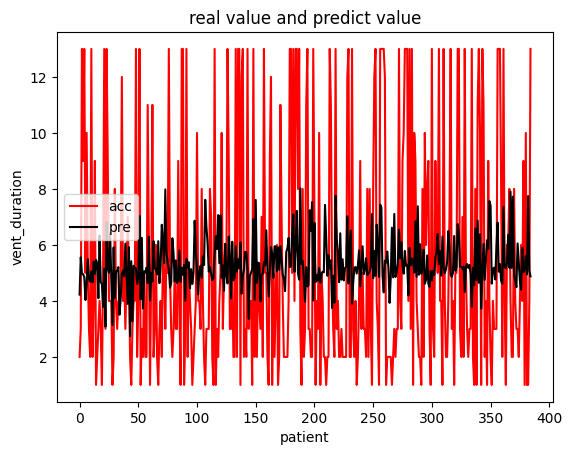

In [ ]:
#Xgboost Regression 6 G2
model = models['xgbr']
model.fit(trainX6, trainY6)
y_pred6 = model.predict(testX6)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY6, y_pred6))) 

import matplotlib.pyplot as plt  

testY6.reset_index(drop=True, inplace=True)

plt.plot(testY6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
1.1245663717699685


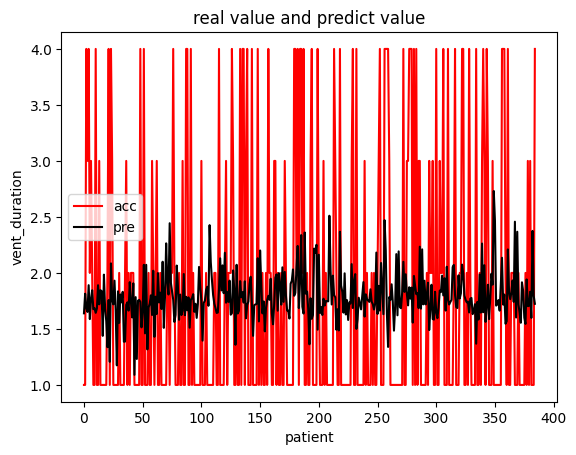

In [ ]:
#Xgboost Regression d G3
model = models['xgbr']
model.fit(trainXd, trainYd)
y_pred_d = model.predict(testXd)

y_pred_d=np.clip(y_pred_d,a_min=1,a_max=4)
from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testYd, y_pred_d))) 

import matplotlib.pyplot as plt  

testYd.reset_index(drop=True, inplace=True)

plt.plot(testYd,color="r",label="acc") 
 
plt.plot(y_pred_d,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
70.31689155352635


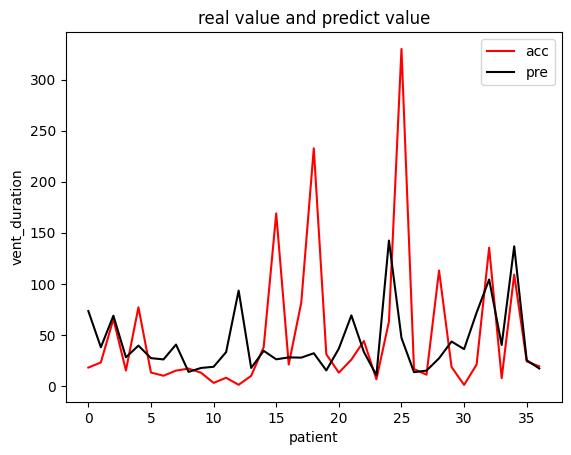

In [ ]:
#Xgboost Regression(add heart_rate and resp_rate) G4
model = models['xgbr']
model.fit(trainX_new, trainY_new)
y_pred = model.predict(testX_new)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_new, y_pred))) 

import matplotlib.pyplot as plt  

testY_new.reset_index(drop=True, inplace=True)

plt.plot(testY_new,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
4.164463949894203


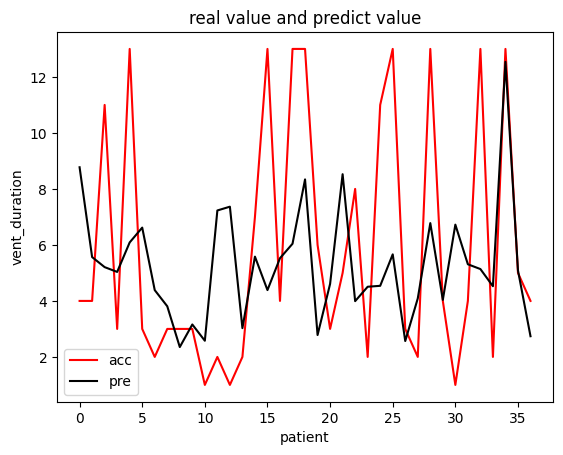

In [ ]:
#Xgboost Regression(add heart_rate and resp_rate) 6 G5
model = models['xgbr']
model.fit(trainX_new6, trainY_new6)
y_pred6 = model.predict(testX_new6)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_new6, y_pred6))) 

import matplotlib.pyplot as plt  

testY_new6.reset_index(drop=True, inplace=True)

plt.plot(testY_new6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

the RMSE is:
1.1248009033942408


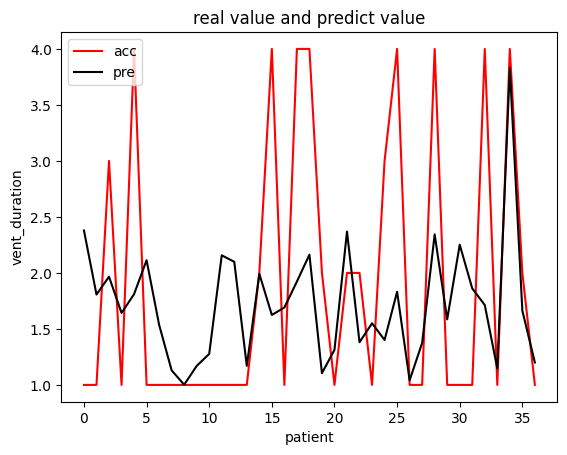

In [ ]:
#Xgboost Regression(add heart_rate and resp_rate) d G6
model = models['xgbr']
model.fit(trainX_newd, trainY_newd)
y_predd = model.predict(testX_newd)


from sklearn import metrics

# RMSE
print("the RMSE is:")
print(np.sqrt(metrics.mean_squared_error(testY_newd, y_predd))) 

import matplotlib.pyplot as plt  

testY_newd.reset_index(drop=True, inplace=True)

plt.plot(testY_newd,color="r",label="acc") 
 
plt.plot(y_predd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011084 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 3412.24	valid_0's rmse: 58.4144
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 3350.38	valid_0's rmse: 57.8824
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 3200.02	valid_0's rmse: 56.5687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 3165.77	valid_0's rmse: 56.2652
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 3150.93	valid_0's rmse: 56.1331
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	val

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


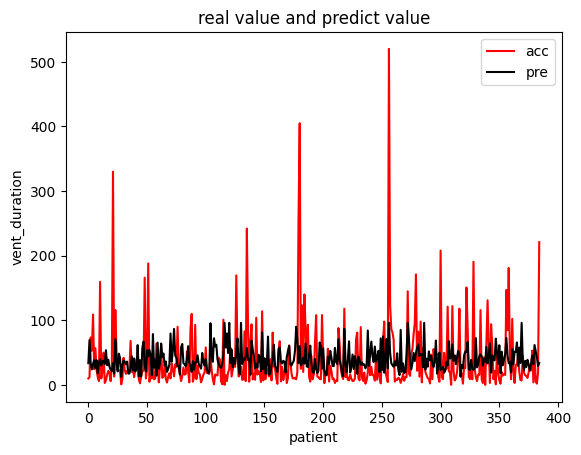

In [ ]:
## lgb G1
import json
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error



lgb_train = lgb.Dataset(trainX, trainY)
lgb_eval = lgb.Dataset(testX, testY, reference=lgb_train)

params = {
    'task': 'predict',
    'boosting_type': 'rf',
    'objective': 'rmse',
    'metric': {'l2', 'rmse'},
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}
print('...')
## train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)
'''

'''
print('predicting...')

y_pred = gbm.predict(testX, num_iteration=gbm.best_iteration)

print('rmse:')
print(mean_squared_error(testY, y_pred) ** 0.5)

import matplotlib.pyplot as plt  

testY.reset_index(drop=True, inplace=True)

plt.plot(testY,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 19.1818	valid_0's rmse: 4.3797
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 19.1232	valid_0's rmse: 4.37301
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 18.204	valid_0's rmse: 4.26661
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 17.9847	valid_0's rmse: 4.24083
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 17.6481	valid_0's rmse: 4.20097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 17.768	valid_0's rmse: 4.21521
[LightGBM] [Warning] No 

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


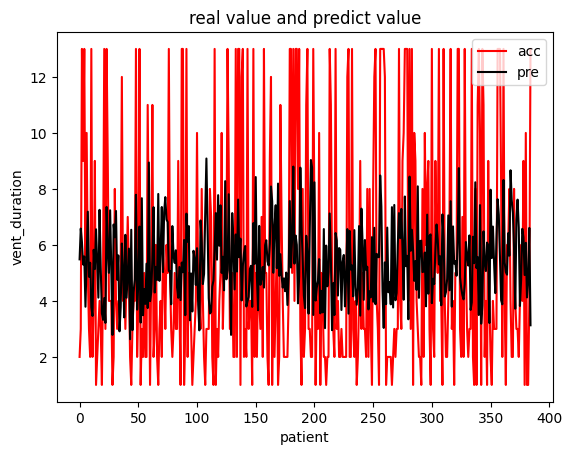

In [ ]:
## lgb 6 G2
import json
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error



lgb_train = lgb.Dataset(trainX6, trainY6)
lgb_eval = lgb.Dataset(testX6, testY6, reference=lgb_train)

params = {
    'task': 'predict',
    'boosting_type': 'rf',
    'objective': 'rmse',
    'metric': {'l2', 'rmse'},
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}
print('...')
## train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('predicting...')

y_pred6 = gbm.predict(testX6, num_iteration=gbm.best_iteration)

print('rmse:')
print(mean_squared_error(testY6, y_pred6) ** 0.5)

import matplotlib.pyplot as plt  

testY6.reset_index(drop=True, inplace=True)

plt.plot(testY6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.42465	valid_0's rmse: 1.19359
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.43064	valid_0's rmse: 1.19609
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.4172	valid_0's rmse: 1.19046
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.41885	valid_0's rmse: 1.19115
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 1.40582	valid_0's rmse: 1.18567
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 1.37925	valid_0's rmse: 1.17442
[LightGBM] [Warning] N

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


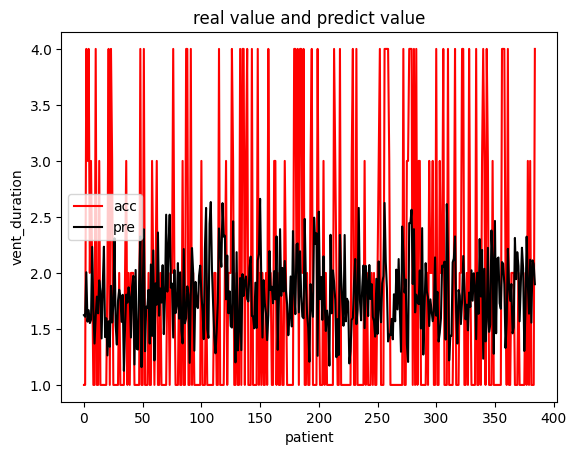

In [ ]:
## lgb d G3
import json
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error



lgb_train = lgb.Dataset(trainXd, trainYd)
lgb_eval = lgb.Dataset(testXd, testYd, reference=lgb_train)

params = {
    'task': 'predict',
    'boosting_type': 'rf',
    'objective': 'rmse',
    'metric': {'l2', 'rmse'},
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}
print('...')
## train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('predicting...')

y_pred_d = gbm.predict(testXd, num_iteration=gbm.best_iteration)

print('rmse:')
print(mean_squared_error(testYd, y_pred_d) ** 0.5)

import matplotlib.pyplot as plt  

testYd.reset_index(drop=True, inplace=True)

plt.plot(testYd,color="r",label="acc") 
 
plt.plot(y_pred_d,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.101987 seconds.
You can set `force_col_wise=true` to remove the overhead.


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 4963.58	valid_0's rmse: 70.4527
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 4963.58	valid_0's rmse: 70.4527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 4963.58	valid_0's rmse: 70.4527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 4963.58	valid_0's rmse: 70.4527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 4963.58	valid_0's rmse: 70.4527
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 4963.58	valid_0's rmse: 70.4527
Early stopping, best iteration is:
[1]	valid_0's l2: 4963.58	valid_0's rmse: 70.4527
predicting...
rmse:
70.45267852504588


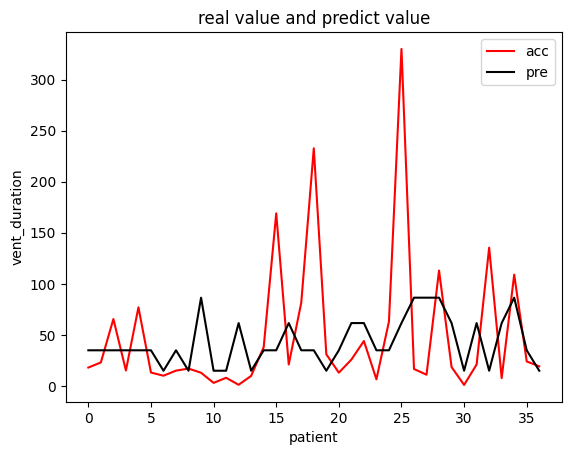

In [ ]:
## lgb(add heart_rate and resp_rate) G4
import json
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error



lgb_train = lgb.Dataset(trainX_new, trainY_new)
lgb_eval = lgb.Dataset(testX_new, testY_new, reference=lgb_train)

params = {
    'task': 'predict',
    'boosting_type': 'rf',
    'objective': 'rmse',
    'metric': {'l2', 'rmse'},
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}
print('...')
## train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('predicting...')

y_pred = gbm.predict(testX_new, num_iteration=gbm.best_iteration)

print('rmse:')
print(mean_squared_error(testY_new, y_pred) ** 0.5)

import matplotlib.pyplot as plt  

testY_new.reset_index(drop=True, inplace=True)

plt.plot(testY_new,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 17.5723	valid_0's rmse: 4.19193
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 17.5723	valid_0's rmse: 4.19193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 17.5723	valid_0's rmse: 4.19193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 17.5723	valid_0's rmse: 4.19193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 17.5723	valid_0's rmse: 4.19193
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 17.5723	valid_0's rmse: 4.19193
Early stopping, best 

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


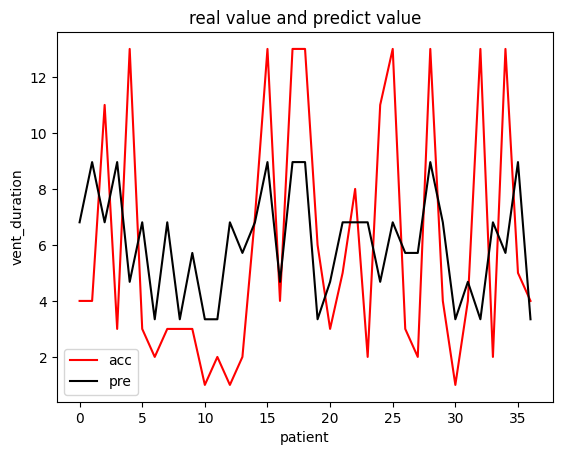

In [ ]:
## lgb(add heart_rate and resp_rate)  6 G5
import json
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error



lgb_train = lgb.Dataset(trainX_new6, trainY_new6)
lgb_eval = lgb.Dataset(testX_new6, testY_new6, reference=lgb_train)

params = {
    'task': 'predict',
    'boosting_type': 'rf',
    'objective': 'rmse',
    'metric': {'l2', 'rmse'},
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}
print('...')
## train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('predicting...')

y_pred6 = gbm.predict(testX_new6, num_iteration=gbm.best_iteration)

print('rmse:')
print(mean_squared_error(testY_new6, y_pred6) ** 0.5)

import matplotlib.pyplot as plt  

testY_new6.reset_index(drop=True, inplace=True)

plt.plot(testY_new6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095979 seconds.
You can set `force_col_wise=true` to remove the overhead.


/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l2: 1.40566	valid_0's rmse: 1.18561
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l2: 1.40566	valid_0's rmse: 1.18561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l2: 1.40566	valid_0's rmse: 1.18561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l2: 1.40566	valid_0's rmse: 1.18561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l2: 1.40566	valid_0's rmse: 1.18561
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l2: 1.40566	valid_0's rmse: 1.18561
Early stopping, best iteration is:
[1]	valid_0's l2: 1.40566	valid_0's rmse: 1.18561
predicting...
rmse:
1.1856052447218417


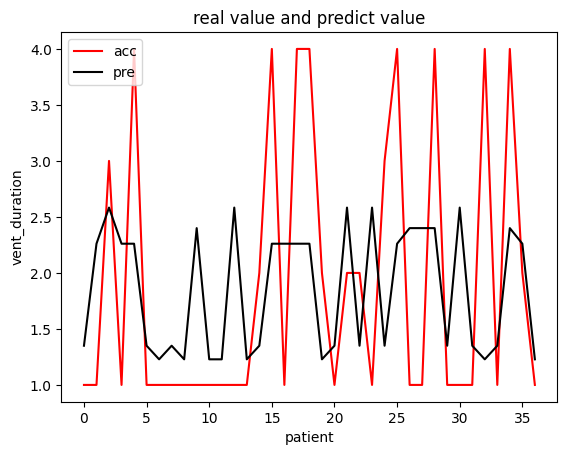

In [ ]:
## lgb(add heart_rate and resp_rate) d G6
import json
import lightgbm as lgb
import pandas as pd
from sklearn.metrics import mean_squared_error



lgb_train = lgb.Dataset(trainX_newd, trainY_newd)
lgb_eval = lgb.Dataset(testX_newd, testY_newd, reference=lgb_train)

params = {
    'task': 'predict',
    'boosting_type': 'rf',
    'objective': 'rmse',
    'metric': {'l2', 'rmse'},
    'num_leaves': 100,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 10,
    'verbose': 0
}
print('...')
## train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

print('predicting...')

y_predd = gbm.predict(testX_newd, num_iteration=gbm.best_iteration)

print('rmse:')
print(mean_squared_error(testY_newd, y_predd) ** 0.5)

import matplotlib.pyplot as plt  

testY_newd.reset_index(drop=True, inplace=True)

plt.plot(testY_newd,color="r",label="acc") 
 
plt.plot(y_predd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

In [ ]:
print(new_dynmaic.head())

    stay_id                charttime  calcium  creatinine  glucose  sodium  \
0  35715575  2148-12-27 18:15:00.000      8.5         0.9    137.0   138.0   
1  34483718  2118-01-04 03:58:00.000      8.2         0.8    129.0   141.0   
2  31826892  2163-03-10 19:59:00.000      7.7         0.4    112.0   136.0   
3  36154799  2131-12-02 19:14:00.000      NaN         NaN      NaN     NaN   
4  32732521  2116-08-12 12:45:00.000      NaN         4.0    135.0   139.0   

   chloride  hemoglobin   wbc  alt  ast  alp  bilirubin_total    pt  
0     104.0         NaN   NaN  NaN  NaN  NaN              NaN   NaN  
1     101.0         8.7  11.3  NaN  NaN  NaN              NaN  12.1  
2      98.0         NaN   NaN  NaN  NaN  NaN              NaN   NaN  
3       NaN        12.3   NaN  NaN  NaN  NaN              NaN   NaN  
4     105.0         NaN   NaN  NaN  NaN  NaN              NaN   NaN  


In [ ]:
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

df = new_dynmaic.sort_values(by=['stay_id', 'time'])
import pandas as pd

col1 = df['stay_id']
col2 = df['time']

df = df.drop(['stay_id', 'time'], axis=1)







Xc1=df.columns

imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
#df=imputer.fit_transform(df)
df =df.fillna(df.mean())
df=pd.DataFrame(preprocessing.normalize(df))


df.columns=Xc1


df['stay_id'] = col1
df['time'] = col2



X = []
current_stay_id = None
current_sample = []
for index, row in df.iterrows():
    if current_stay_id is None:
        current_stay_id = row['stay_id']
    if row['stay_id'] != current_stay_id:
        X.append(current_sample)
        current_stay_id = row['stay_id']
        current_sample = []
    current_sample.append(row.drop(['stay_id', 'time']).values)
X.append(current_sample)



X = np.array(X)
'''
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Load data
df = new_dynmaic.sort_values(by=['stay_id', 'time'])
col1 = df['stay_id']
col2 = df['time']
df = df.drop(['stay_id','time'], axis=1)
dfc=df.columns
# Remove outliers
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1
df = df.mask((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)), np.tile(df.mean(axis=0).values, (df.shape[0], 1)))

# Impute missing values with KNN
df = np.array(df)
imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
df = imputer.fit_transform(df)

# Impute missing values with mean imputation
#df = df.fillna(df.mean())

# Normalize data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=dfc)

df['stay_id'] = col1
df['time'] = col2

# Reconstruct data into array
X = []
current_stay_id = None
current_sample = []
for index, row in df.iterrows():
    if current_stay_id is None:
        current_stay_id = row['stay_id']
    if row['stay_id'] != current_stay_id:
        X.append(current_sample)
        current_stay_id = row['stay_id']
        current_sample = []
    current_sample.append(row.drop(['stay_id', 'time']).values)
X.append(current_sample)
'''
# Impute missing values with KNN
X = np.array(X)
imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
X = imputer.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)

'''





"\n# Impute missing values with KNN\nX = np.array(X)\nimputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')\nX = imputer.fit_transform(X.reshape(-1, X.shape[-1])).reshape(X.shape)\n\n"

In [ ]:
import numpy as np
from scipy import interpolate

# Define the desired shape of the padded sequence
target_shape = (8, 12)

# Interpolate to pad the sequences
X_padded = np.zeros((len(X),) + target_shape)

for i in range(len(X)):
    f = interpolate.interp1d(np.arange(len(X[i])), X[i], axis=0, kind='linear', fill_value='extrapolate')
    new_x = f(np.linspace(0, len(X[i])-1, target_shape[0]))
    X_padded[i] = new_x

X_padded = np.nan_to_num(X_padded)
# Print the shapes of original and padded datasets
#print('Original:', X.shape)
print('Interpolation padding:', X_padded.shape)


/usr/local/lib/python3.9/dist-packages/scipy/interpolate/_interpolate.py:698: RuntimeWarning: invalid value encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


Interpolation padding: (1923, 8, 12)


In [ ]:
Y_total=pd.read_csv(r"/content/sph_static_final.csv")
Y_total = Y_total.sort_values(by='stay_id')
print(Y_total.shape)
Y_total.head()

(1923, 7)


,stay_id,icu_intime,vent_start,vent_end,vent_duration,vent_duration_group_in_days,vent_duration_group_in_hours_3_day
1116,30004144,20:25.0,2004/5/26 16:00,2004/6/26 17:00,25.000000,2,5
239,30005366,36:59.0,12/28/02 14:00,12/28/02 20:00,6.000000,1,2
1467,30006983,56:42.0,10/12/59 18:00,10/14/59 19:00,49.000000,3,9
1117,30023204,43:55.0,2007/11/24 16:00,2007/12/24 16:10,24.166667,2,5
240,30031418,11:00.0,3/7/56 22:06,3/8/56 8:00,9.900000,1,2


In [ ]:
#define different Y_group
Yhr=Y_total['vent_duration']
Y6hr=Y_total['vent_duration_group_in_hours_3_day']
Ydy=Y_total['vent_duration_group_in_days']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_padded, Yhr, test_size=0.2, random_state=3)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X_padded, Y6hr, test_size=0.2, random_state=3)
X_traind, X_testd, y_traind, y_testd = train_test_split(X_padded, Ydy, test_size=0.2, random_state=3)

In [ ]:
# lstm in hourly prediction G!


import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error







model = Sequential()
model.add(LSTM(64, input_shape=(8, 12), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='RMSprop')

# Fit model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2, callbacks=[early_stop])

# Make predictions
y_pred = model.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_test.reset_index(drop=True, inplace=True)

plt.plot(y_test,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

model.summary()
'''


Epoch 1/50
25/25 - 7s - loss: 4732.6987 - val_loss: 3867.5125 - 7s/epoch - 266ms/step
Epoch 2/50
25/25 - 0s - loss: 4387.4351 - val_loss: 3752.0166 - 388ms/epoch - 16ms/step
Epoch 3/50
25/25 - 0s - loss: 4313.1719 - val_loss: 3703.0444 - 372ms/epoch - 15ms/step
Epoch 4/50
25/25 - 0s - loss: 4254.9761 - val_loss: 3656.1006 - 372ms/epoch - 15ms/step
Epoch 5/50
25/25 - 0s - loss: 4217.1558 - val_loss: 3620.7478 - 397ms/epoch - 16ms/step
Epoch 6/50
25/25 - 0s - loss: 4178.0684 - val_loss: 3584.1606 - 376ms/epoch - 15ms/step
Epoch 7/50
25/25 - 0s - loss: 4135.8906 - val_loss: 3547.2439 - 372ms/epoch - 15ms/step
Epoch 8/50
25/25 - 0s - loss: 4098.4170 - val_loss: 3509.3494 - 406ms/epoch - 16ms/step
Epoch 9/50
25/25 - 1s - loss: 4059.9519 - val_loss: 3475.9036 - 591ms/epoch - 24ms/step
Epoch 10/50
25/25 - 1s - loss: 4029.7969 - val_loss: 3438.7402 - 583ms/epoch - 23ms/step
Epoch 11/50
25/25 - 1s - loss: 3985.5254 - val_loss: 3413.9458 - 584ms/epoch - 23ms/step
Epoch 12/50
25/25 - 1s - loss: 3

'\nimport matplotlib.pyplot as plt  \n\ny_test.reset_index(drop=True, inplace=True)\n\nplt.plot(y_test,color="r",label="acc") \n \nplt.plot(y_pred,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n\nmodel.summary()\n'

In [ ]:
# lstm in 6-hourly prediction G2


import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error







model = Sequential()
model.add(LSTM(64, input_shape=(8, 12), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile model
model.compile(loss='mse', optimizer='adam')

# Fit model with early stopping

history = model.fit(X_train6, y_train6, epochs=50, batch_size=64, validation_data=(X_test6, y_test6), verbose=2)

# Make predictions
y_pred6 = model.predict(X_test)
y_pred6 = np.around(y_pred6)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test6, y_pred6))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_test6.reset_index(drop=True, inplace=True)

plt.plot(y_test6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

model.summary()
'''

Epoch 1/50
25/25 - 7s - loss: 40.3821 - val_loss: 26.4379 - 7s/epoch - 273ms/step
Epoch 2/50
25/25 - 1s - loss: 20.5863 - val_loss: 17.1289 - 641ms/epoch - 26ms/step
Epoch 3/50
25/25 - 1s - loss: 17.5051 - val_loss: 16.7895 - 609ms/epoch - 24ms/step
Epoch 4/50
25/25 - 1s - loss: 17.6144 - val_loss: 16.7274 - 645ms/epoch - 26ms/step
Epoch 5/50
25/25 - 0s - loss: 17.3692 - val_loss: 16.7298 - 465ms/epoch - 19ms/step
Epoch 6/50
25/25 - 0s - loss: 17.2223 - val_loss: 16.7313 - 398ms/epoch - 16ms/step
Epoch 7/50
25/25 - 0s - loss: 17.3946 - val_loss: 16.7306 - 389ms/epoch - 16ms/step
Epoch 8/50
25/25 - 0s - loss: 17.5419 - val_loss: 16.7330 - 427ms/epoch - 17ms/step
Epoch 9/50
25/25 - 0s - loss: 17.2180 - val_loss: 16.7418 - 398ms/epoch - 16ms/step
Epoch 10/50
25/25 - 0s - loss: 17.6518 - val_loss: 16.7411 - 393ms/epoch - 16ms/step
Epoch 11/50
25/25 - 0s - loss: 17.3253 - val_loss: 16.7301 - 425ms/epoch - 17ms/step
Epoch 12/50
25/25 - 0s - loss: 17.3117 - val_loss: 16.7267 - 420ms/epoch - 1

'\nimport matplotlib.pyplot as plt  \n\ny_test6.reset_index(drop=True, inplace=True)\n\nplt.plot(y_test6,color="r",label="acc") \n \nplt.plot(y_pred6,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n\nmodel.summary()\n'

In [ ]:
# lstm in dayly prediction G3


import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error








model = Sequential()
model.add(LSTM(64, input_shape=(8, 12), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
# Compile model
model.compile(loss='mse', optimizer='RMSprop')

# Fit model with early stopping

history = model.fit(X_traind, y_traind, epochs=50, batch_size=64, validation_data=(X_testd, y_testd), verbose=2)

# Make predictions
y_predd = model.predict(X_testd)
y_predd = np.around(y_predd)
y_predd=np.clip(y_predd,a_min=1,a_max=4)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_testd, y_predd))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_testd.reset_index(drop=True, inplace=True)

plt.plot(y_testd,color="r",label="acc") 
 
plt.plot(y_predd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

model.summary()
'''

Epoch 1/50
25/25 - 5s - loss: 2.2125 - val_loss: 1.6237 - 5s/epoch - 202ms/step
Epoch 2/50
25/25 - 0s - loss: 1.3619 - val_loss: 1.3175 - 403ms/epoch - 16ms/step
Epoch 3/50
25/25 - 0s - loss: 1.3061 - val_loss: 1.5363 - 426ms/epoch - 17ms/step
Epoch 4/50
25/25 - 0s - loss: 1.3038 - val_loss: 1.3871 - 386ms/epoch - 15ms/step
Epoch 5/50
25/25 - 0s - loss: 1.3057 - val_loss: 1.3785 - 425ms/epoch - 17ms/step
Epoch 6/50
25/25 - 0s - loss: 1.2832 - val_loss: 1.4958 - 396ms/epoch - 16ms/step
Epoch 7/50
25/25 - 1s - loss: 1.2934 - val_loss: 1.3687 - 587ms/epoch - 23ms/step
Epoch 8/50
25/25 - 1s - loss: 1.2935 - val_loss: 1.3668 - 618ms/epoch - 25ms/step
Epoch 9/50
25/25 - 1s - loss: 1.2753 - val_loss: 1.2622 - 584ms/epoch - 23ms/step
Epoch 10/50
25/25 - 1s - loss: 1.2798 - val_loss: 1.4121 - 605ms/epoch - 24ms/step
Epoch 11/50
25/25 - 1s - loss: 1.2889 - val_loss: 1.4067 - 563ms/epoch - 23ms/step
Epoch 12/50
25/25 - 0s - loss: 1.2877 - val_loss: 1.2999 - 396ms/epoch - 16ms/step
Epoch 13/50
25/

'\nimport matplotlib.pyplot as plt  \n\ny_testd.reset_index(drop=True, inplace=True)\n\nplt.plot(y_testd,color="r",label="acc") \n \nplt.plot(y_predd,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n\nmodel.summary()\n'

In [ ]:
#CNN hoursly G1


import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

model = Sequential()

# Convolutional Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8, 12)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten Layers
model.add(Flatten())

# Dense Layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mse')



history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2)
y_pred=model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)

#plot_model(model, to_file='cnn.png', show_shapes=True)
import matplotlib.pyplot as plt  

y_test.reset_index(drop=True, inplace=True)
'''
plt.plot(y_test,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

model.summary()
'''


Epoch 1/50
25/25 - 2s - loss: 4894.2163 - val_loss: 3944.8999 - 2s/epoch - 60ms/step
Epoch 2/50
25/25 - 0s - loss: 4079.8059 - val_loss: 3218.4358 - 160ms/epoch - 6ms/step
Epoch 3/50
25/25 - 0s - loss: 3798.1804 - val_loss: 3128.6450 - 173ms/epoch - 7ms/step
Epoch 4/50
25/25 - 0s - loss: 3702.9854 - val_loss: 3064.1970 - 185ms/epoch - 7ms/step
Epoch 5/50
25/25 - 0s - loss: 3595.6555 - val_loss: 2995.9639 - 148ms/epoch - 6ms/step
Epoch 6/50
25/25 - 0s - loss: 3534.1912 - val_loss: 2940.4285 - 168ms/epoch - 7ms/step
Epoch 7/50
25/25 - 0s - loss: 3416.7800 - val_loss: 2930.4861 - 153ms/epoch - 6ms/step
Epoch 8/50
25/25 - 0s - loss: 3456.1658 - val_loss: 2932.3821 - 160ms/epoch - 6ms/step
Epoch 9/50
25/25 - 0s - loss: 3435.6340 - val_loss: 2937.5779 - 145ms/epoch - 6ms/step
Epoch 10/50
25/25 - 0s - loss: 3432.1804 - val_loss: 2966.3979 - 160ms/epoch - 6ms/step
Epoch 11/50
25/25 - 0s - loss: 3459.3530 - val_loss: 2930.7217 - 152ms/epoch - 6ms/step
Epoch 12/50
25/25 - 0s - loss: 3461.6128 - 

'\nplt.plot(y_test,color="r",label="acc") \n \nplt.plot(y_pred,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n\nmodel.summary()\n'

In [ ]:
#CNN 6 hoursly G2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

model = Sequential()

# Convolutional Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8, 12)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten Layers
model.add(Flatten())

# Dense Layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='relu'))

# Compile the model

model.compile(optimizer='adam', loss='mse')


history = model.fit(X_train6, y_train6, epochs=50, batch_size=64, validation_data=(X_test6, y_test6), verbose=2)
y_predcnn6=model.predict(X_test6)
y_predcnn6=np.clip(y_predcnn6,a_min=1, a_max=13)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test6, y_predcnn6))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_test6.reset_index(drop=True, inplace=True)

plt.plot(y_test6,color="r",label="acc") 
 
plt.plot(y_predcnn6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

model.summary()
'''

Epoch 1/50
25/25 - 1s - loss: 34.7803 - val_loss: 23.9579 - 1s/epoch - 54ms/step
Epoch 2/50
25/25 - 0s - loss: 24.4681 - val_loss: 20.2309 - 154ms/epoch - 6ms/step
Epoch 3/50
25/25 - 0s - loss: 20.2207 - val_loss: 17.2602 - 161ms/epoch - 6ms/step
Epoch 4/50
25/25 - 0s - loss: 18.4868 - val_loss: 16.8538 - 150ms/epoch - 6ms/step
Epoch 5/50
25/25 - 0s - loss: 19.2930 - val_loss: 16.7689 - 172ms/epoch - 7ms/step
Epoch 6/50
25/25 - 0s - loss: 18.6262 - val_loss: 17.2692 - 154ms/epoch - 6ms/step
Epoch 7/50
25/25 - 0s - loss: 18.3785 - val_loss: 16.7027 - 159ms/epoch - 6ms/step
Epoch 8/50
25/25 - 0s - loss: 18.5196 - val_loss: 16.6968 - 164ms/epoch - 7ms/step
Epoch 9/50
25/25 - 0s - loss: 18.4077 - val_loss: 17.4012 - 151ms/epoch - 6ms/step
Epoch 10/50
25/25 - 0s - loss: 18.1602 - val_loss: 16.7509 - 158ms/epoch - 6ms/step
Epoch 11/50
25/25 - 0s - loss: 18.1719 - val_loss: 16.7607 - 153ms/epoch - 6ms/step
Epoch 12/50
25/25 - 0s - loss: 18.4086 - val_loss: 16.7328 - 169ms/epoch - 7ms/step
Epo

'\nimport matplotlib.pyplot as plt  \n\ny_test6.reset_index(drop=True, inplace=True)\n\nplt.plot(y_test6,color="r",label="acc") \n \nplt.plot(y_predcnn6,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n\nmodel.summary()\n'

In [ ]:
#CNN 6 hoursly G3
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

model = Sequential()

# Convolutional Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8, 12)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten Layers
model.add(Flatten())

# Dense Layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mse')



history = model.fit(X_traind, y_traind, epochs=50, batch_size=64, validation_data=(X_testd, y_testd), verbose=2)
y_predcnnd=model.predict(X_testd)
y_predcnnd=np.clip(y_predcnnd,a_min=1, a_max=13)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_testd, y_predcnnd))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_testd.reset_index(drop=True, inplace=True)

plt.plot(y_testd,color="r",label="acc") 
 
plt.plot(y_predcnnd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

model.summary()
'''

Epoch 1/50
25/25 - 1s - loss: 2.9520 - val_loss: 1.9469 - 1s/epoch - 51ms/step
Epoch 2/50
25/25 - 0s - loss: 1.9826 - val_loss: 1.4663 - 157ms/epoch - 6ms/step
Epoch 3/50
25/25 - 0s - loss: 1.4642 - val_loss: 1.2448 - 139ms/epoch - 6ms/step
Epoch 4/50
25/25 - 0s - loss: 1.4200 - val_loss: 1.2421 - 144ms/epoch - 6ms/step
Epoch 5/50
25/25 - 0s - loss: 1.3738 - val_loss: 1.2499 - 181ms/epoch - 7ms/step
Epoch 6/50
25/25 - 0s - loss: 1.3936 - val_loss: 1.2404 - 159ms/epoch - 6ms/step
Epoch 7/50
25/25 - 0s - loss: 1.4267 - val_loss: 1.2737 - 155ms/epoch - 6ms/step
Epoch 8/50
25/25 - 0s - loss: 1.4542 - val_loss: 1.2473 - 171ms/epoch - 7ms/step
Epoch 9/50
25/25 - 0s - loss: 1.3541 - val_loss: 1.2430 - 154ms/epoch - 6ms/step
Epoch 10/50
25/25 - 0s - loss: 1.3777 - val_loss: 1.2482 - 149ms/epoch - 6ms/step
Epoch 11/50
25/25 - 0s - loss: 1.4179 - val_loss: 1.2390 - 148ms/epoch - 6ms/step
Epoch 12/50
25/25 - 0s - loss: 1.3518 - val_loss: 1.2378 - 165ms/epoch - 7ms/step
Epoch 13/50
25/25 - 0s - lo

'\nimport matplotlib.pyplot as plt  \n\ny_testd.reset_index(drop=True, inplace=True)\n\nplt.plot(y_testd,color="r",label="acc") \n \nplt.plot(y_predcnnd,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n\nmodel.summary()\n'

In [ ]:
#cnn-lstm hoursly G1
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
model = Sequential()

# Convolutional Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8, 12)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# LSTM Layer
model.add(LSTM(units=50, return_sequences=True))

# Flatten Layers
model.add(Flatten())

# Dense Layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='RMSprop', loss='hinge')

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test), verbose=2)
y_pred=model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE:', rmse)
'''
import matplotlib.pyplot as plt  

y_test.reset_index(drop=True, inplace=True)

plt.plot(y_test,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()
'''
model.summary()


Epoch 1/50
25/25 - 3s - loss: 0.0754 - val_loss: 0.0079 - 3s/epoch - 135ms/step
Epoch 2/50
25/25 - 0s - loss: 0.0124 - val_loss: 0.0067 - 258ms/epoch - 10ms/step
Epoch 3/50
25/25 - 0s - loss: 0.0061 - val_loss: 0.0055 - 283ms/epoch - 11ms/step
Epoch 4/50
25/25 - 0s - loss: 0.0032 - val_loss: 0.0047 - 307ms/epoch - 12ms/step
Epoch 5/50
25/25 - 0s - loss: 0.0021 - val_loss: 0.0040 - 285ms/epoch - 11ms/step
Epoch 6/50
25/25 - 0s - loss: 0.0021 - val_loss: 0.0036 - 297ms/epoch - 12ms/step
Epoch 7/50
25/25 - 0s - loss: 0.0017 - val_loss: 0.0034 - 274ms/epoch - 11ms/step
Epoch 8/50
25/25 - 0s - loss: 0.0016 - val_loss: 0.0032 - 286ms/epoch - 11ms/step
Epoch 9/50
25/25 - 0s - loss: 0.0014 - val_loss: 0.0031 - 322ms/epoch - 13ms/step
Epoch 10/50
25/25 - 0s - loss: 0.0015 - val_loss: 0.0029 - 272ms/epoch - 11ms/step
Epoch 11/50
25/25 - 0s - loss: 0.0014 - val_loss: 0.0028 - 279ms/epoch - 11ms/step
Epoch 12/50
25/25 - 0s - loss: 0.0013 - val_loss: 0.0027 - 323ms/epoch - 13ms/step
Epoch 13/50
25/

In [ ]:
#cnn-lstm 6 hoursly G2
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

model = Sequential()

# Convolutional Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8, 12)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# LSTM Layer
model.add(LSTM(units=50, return_sequences=True))

# Flatten Layers
model.add(Flatten())

# Dense Layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='RMSprop', loss='huber')

history = model.fit(X_train6, y_train6, epochs=50, batch_size=64, validation_data=(X_test6, y_test6), verbose=2)
y_predcnnlstm6=model.predict(X_test6)
y_predcnnlstm6=np.clip(y_predcnnlstm6,a_min=1,a_max=13)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test6, y_predcnnlstm6))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_test6.reset_index(drop=True, inplace=True)

plt.plot(y_test6,color="r",label="acc") 
 
plt.plot(y_predcnnlstm6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()
'''

# Print model summary
model.summary()

Epoch 1/50
25/25 - 3s - loss: 3.6501 - val_loss: 3.0511 - 3s/epoch - 138ms/step
Epoch 2/50
25/25 - 0s - loss: 3.0645 - val_loss: 2.7591 - 262ms/epoch - 10ms/step
Epoch 3/50
25/25 - 0s - loss: 2.8909 - val_loss: 2.6853 - 374ms/epoch - 15ms/step
Epoch 4/50
25/25 - 0s - loss: 2.8500 - val_loss: 2.7632 - 341ms/epoch - 14ms/step
Epoch 5/50
25/25 - 0s - loss: 2.8657 - val_loss: 2.7000 - 378ms/epoch - 15ms/step
Epoch 6/50
25/25 - 0s - loss: 2.8390 - val_loss: 2.7186 - 377ms/epoch - 15ms/step
Epoch 7/50
25/25 - 0s - loss: 2.8897 - val_loss: 2.7354 - 375ms/epoch - 15ms/step
Epoch 8/50
25/25 - 0s - loss: 2.8509 - val_loss: 2.6867 - 379ms/epoch - 15ms/step
Epoch 9/50
25/25 - 0s - loss: 2.8903 - val_loss: 2.7093 - 385ms/epoch - 15ms/step
Epoch 10/50
25/25 - 0s - loss: 2.8385 - val_loss: 2.7349 - 249ms/epoch - 10ms/step
Epoch 11/50
25/25 - 0s - loss: 2.8571 - val_loss: 2.6960 - 276ms/epoch - 11ms/step
Epoch 12/50
25/25 - 0s - loss: 2.8714 - val_loss: 2.6867 - 265ms/epoch - 11ms/step
Epoch 13/50
25/

In [ ]:
#cnn-lstm 6 hoursly G3
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, LSTM, Dense, Dropout

model = Sequential()

# Convolutional Layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(8, 12)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# LSTM Layer
model.add(LSTM(units=50, return_sequences=True))

# Flatten Layers
model.add(Flatten())

# Dense Layers
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='RMSprop', loss='huber')

history = model.fit(X_traind, y_traind, epochs=50, batch_size=64, validation_data=(X_testd, y_testd), verbose=2)
y_predcnnlstmd=model.predict(X_testd)
y_predcnnlstmd=np.clip(y_predcnnlstmd,a_min=1,a_max=13)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_testd, y_predcnnlstmd))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_testd.reset_index(drop=True, inplace=True)

plt.plot(y_testd,color="r",label="acc") 
 
plt.plot(y_predcnnlstmd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()
'''

# Print model summary
model.summary()

Epoch 1/50
25/25 - 6s - loss: 0.8028 - val_loss: 0.6285 - 6s/epoch - 224ms/step
Epoch 2/50
25/25 - 0s - loss: 0.5843 - val_loss: 0.5815 - 228ms/epoch - 9ms/step
Epoch 3/50
25/25 - 0s - loss: 0.5385 - val_loss: 0.5822 - 236ms/epoch - 9ms/step
Epoch 4/50
25/25 - 0s - loss: 0.5375 - val_loss: 0.5944 - 383ms/epoch - 15ms/step
Epoch 5/50
25/25 - 0s - loss: 0.5413 - val_loss: 0.4899 - 359ms/epoch - 14ms/step
Epoch 6/50
25/25 - 1s - loss: 0.5341 - val_loss: 0.5199 - 599ms/epoch - 24ms/step
Epoch 7/50
25/25 - 0s - loss: 0.5331 - val_loss: 0.4870 - 337ms/epoch - 13ms/step
Epoch 8/50
25/25 - 0s - loss: 0.5181 - val_loss: 0.5399 - 345ms/epoch - 14ms/step
Epoch 9/50
25/25 - 0s - loss: 0.5249 - val_loss: 0.5248 - 377ms/epoch - 15ms/step
Epoch 10/50
25/25 - 0s - loss: 0.5269 - val_loss: 0.4897 - 375ms/epoch - 15ms/step
Epoch 11/50
25/25 - 0s - loss: 0.5309 - val_loss: 0.4883 - 250ms/epoch - 10ms/step
Epoch 12/50
25/25 - 0s - loss: 0.5287 - val_loss: 0.4870 - 238ms/epoch - 10ms/step
Epoch 13/50
25/25

In [ ]:
#tcn hoursly G1

import tensorflow as tf
from keras.layers import Input, Dense, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.models import Model

from sklearn.model_selection import train_test_split
import numpy as np


input_layer = Input(shape=(8, 12))

# Temporal Convolutional Layer
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(input_layer)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)


x = GlobalMaxPooling1D()(x)

output_layer = Dense(1)(x)


model = Model(input_layer, output_layer)


model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

y_predtcn=model.predict(X_test)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_predtcn))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_test.reset_index(drop=True, inplace=True)

plt.plot(y_test,color="r",label="acc") 
 
plt.plot(y_predtcn,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

'''
# Print model summary
model.summary()




Epoch 1/50
49/49 [==============================] - 3s 22ms/step - loss: 4446.0669 - val_loss: 3103.7910
Epoch 2/50
49/49 [==============================] - 1s 12ms/step - loss: 3595.8184 - val_loss: 2973.8931
Epoch 3/50
49/49 [==============================] - 1s 13ms/step - loss: 3433.8179 - val_loss: 2955.1289
Epoch 4/50
49/49 [==============================] - 1s 16ms/step - loss: 3455.1880 - val_loss: 2955.3542
Epoch 5/50
49/49 [==============================] - 1s 17ms/step - loss: 3408.9197 - val_loss: 2949.7551
Epoch 6/50
49/49 [==============================] - 1s 21ms/step - loss: 3419.3953 - val_loss: 2975.9658
Epoch 7/50
49/49 [==============================] - 1s 28ms/step - loss: 3438.6204 - val_loss: 2959.9294
Epoch 8/50
49/49 [==============================] - 1s 13ms/step - loss: 3398.5203 - val_loss: 2955.0029
Epoch 9/50
49/49 [==============================] - 0s 8ms/step - loss: 3390.6023 - val_loss: 2996.5305
Epoch 10/50
49/49 [==============================] - 0s 

Epoch 1/50
49/49 [==============================] - 2s 20ms/step - loss: 3.5086 - val_loss: 2.7278
Epoch 2/50
49/49 [==============================] - 1s 15ms/step - loss: 2.8195 - val_loss: 2.7019
Epoch 3/50
49/49 [==============================] - 1s 15ms/step - loss: 2.7893 - val_loss: 2.6910
Epoch 4/50
49/49 [==============================] - 1s 16ms/step - loss: 2.7987 - val_loss: 2.6984
Epoch 5/50
49/49 [==============================] - 1s 18ms/step - loss: 2.7876 - val_loss: 2.6935
Epoch 6/50
49/49 [==============================] - 1s 12ms/step - loss: 2.8241 - val_loss: 2.7482
Epoch 7/50
49/49 [==============================] - 0s 9ms/step - loss: 2.7969 - val_loss: 2.7138
Epoch 8/50
49/49 [==============================] - 0s 7ms/step - loss: 2.7939 - val_loss: 2.6888
Epoch 9/50
49/49 [==============================] - 0s 7ms/step - loss: 2.7805 - val_loss: 2.7509
Epoch 10/50
49/49 [==============================] - 0s 7ms/step - loss: 2.8038 - val_loss: 2.6917
Epoch 11/50
4

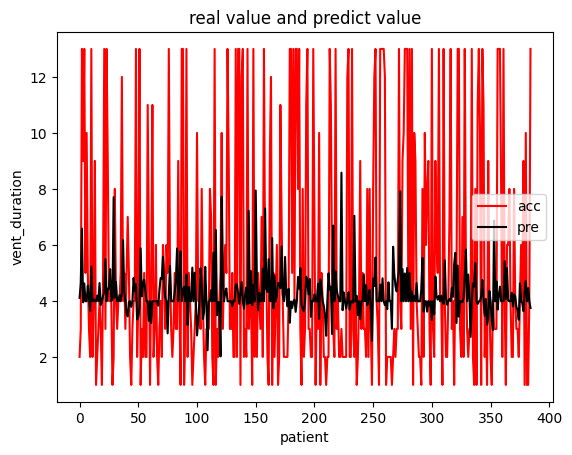

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8, 12)]           0         
                                                                 
 conv1d_40 (Conv1D)          (None, 8, 64)             1600      
                                                                 
 conv1d_41 (Conv1D)          (None, 8, 64)             8256      
                                                                 
 conv1d_42 (Conv1D)          (None, 8, 64)             8256      
                                                                 
 conv1d_43 (Conv1D)          (None, 8, 64)             8256      
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                           

In [ ]:
#tcn 6-hoursly G2

import tensorflow as tf
from keras.layers import Input, Dense, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.models import Model

from sklearn.model_selection import train_test_split
import numpy as np


input_layer = Input(shape=(8, 12))

# Temporal Convolutional Layer
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(input_layer)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)


x = GlobalMaxPooling1D()(x)

output_layer = Dense(1)(x)


model = Model(input_layer, output_layer)


model.compile(optimizer=Adam(learning_rate=0.001), loss='huber')


history = model.fit(X_train6, y_train6, epochs=50, batch_size=32, validation_data=(X_test6, y_test6))

y_predtcn6=model.predict(X_test6)
y_predtcn6=np.clip(y_predtcn6, a_min=1,a_max=13)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test6, y_predtcn6))
print('Test RMSE:', rmse)


import matplotlib.pyplot as plt  

y_test6.reset_index(drop=True, inplace=True)

plt.plot(y_test6,color="r",label="acc") 
 
plt.plot(y_predtcn6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()


# Print model summary
model.summary()

In [ ]:
#tcn dayly G3

import tensorflow as tf
from keras.layers import Input, Dense, Conv1D, GlobalMaxPooling1D
from keras.optimizers import Adam
from keras.models import Model

from sklearn.model_selection import train_test_split
import numpy as np


input_layer = Input(shape=(8, 12))

# Temporal Convolutional Layer
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(input_layer)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)
x = Conv1D(64, kernel_size=2, activation='relu', padding='causal')(x)


x = GlobalMaxPooling1D()(x)

output_layer = Dense(1)(x)


model = Model(input_layer, output_layer)


model.compile(optimizer=Adam(learning_rate=0.001), loss='huber')


history = model.fit(X_traind, y_traind, epochs=50, batch_size=32, validation_data=(X_testd, y_testd))

y_predtcnd=model.predict(X_testd)
y_predtcnd=np.clip(y_predtcnd, a_min=1,a_max=4)
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_testd, y_predtcnd))
print('Test RMSE:', rmse)

'''
import matplotlib.pyplot as plt  

y_testd.reset_index(drop=True, inplace=True)

plt.plot(y_testd,color="r",label="acc") 
 
plt.plot(y_predtcnd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()

'''
# Print model summary
model.summary()

Epoch 1/50
49/49 [==============================] - 2s 10ms/step - loss: 0.6605 - val_loss: 0.5147
Epoch 2/50
49/49 [==============================] - 0s 7ms/step - loss: 0.4928 - val_loss: 0.4876
Epoch 3/50
49/49 [==============================] - 0s 8ms/step - loss: 0.4876 - val_loss: 0.4945
Epoch 4/50
49/49 [==============================] - 0s 7ms/step - loss: 0.4875 - val_loss: 0.4905
Epoch 5/50
49/49 [==============================] - 0s 7ms/step - loss: 0.4871 - val_loss: 0.4893
Epoch 6/50
49/49 [==============================] - 0s 8ms/step - loss: 0.4843 - val_loss: 0.4880
Epoch 7/50
49/49 [==============================] - 0s 7ms/step - loss: 0.4833 - val_loss: 0.4886
Epoch 8/50
49/49 [==============================] - 0s 8ms/step - loss: 0.4919 - val_loss: 0.4941
Epoch 9/50
49/49 [==============================] - 0s 8ms/step - loss: 0.4863 - val_loss: 0.4878
Epoch 10/50
49/49 [==============================] - 0s 7ms/step - loss: 0.4854 - val_loss: 0.4870
Epoch 11/50
49/49 

In [ ]:
#fnn G1
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os
import sys
import time
from tensorflow import keras

model = tf.keras.Sequential([tf.keras.layers.Dense(200, input_shape=(8,12), activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(25, activation='relu'),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(1)])

model.summary()
model.compile(optimizer='adam', loss='mse')
k = model.fit(X_train, y_train, epochs=50)
y_pred = model.predict(X_test)
print('rmse:')
print(mean_squared_error(y_test, y_pred) ** 0.5)
'''
import matplotlib.pyplot as plt  

y_test.reset_index(drop=True, inplace=True)

plt.plot(y_test,color="r",label="acc") 
 
plt.plot(y_pred,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()
'''

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 8, 200)            2600      
                                                                 
 dense_110 (Dense)           (None, 8, 100)            20100     
                                                                 
 dense_111 (Dense)           (None, 8, 50)             5050      
                                                                 
 dense_112 (Dense)           (None, 8, 25)             1275      
                                                                 
 global_average_pooling1d_7   (None, 25)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_113 (Dense)           (None, 1)                 26        
                                                     

'\nimport matplotlib.pyplot as plt  \n\ny_test.reset_index(drop=True, inplace=True)\n\nplt.plot(y_test,color="r",label="acc") \n \nplt.plot(y_pred,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n'

In [ ]:
#fcn G2
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os
import sys
import time
from tensorflow import keras

model = tf.keras.Sequential([tf.keras.layers.Dense(200, input_shape=(8,12), activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(25, activation='relu'),
                              tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(1)])

model.summary()
model.compile(optimizer='adam', loss='mse')
k = model.fit(X_train6, y_train6, epochs=50)
y_pred6 = model.predict(X_test6)
print('rmse:')
print(mean_squared_error(y_test6, y_pred6) ** 0.5)
'''
import matplotlib.pyplot as plt  

y_test6.reset_index(drop=True, inplace=True)

plt.plot(y_test6,color="r",label="acc") 
 
plt.plot(y_pred6,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()
'''

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 8, 200)            2600      
                                                                 
 dense_115 (Dense)           (None, 8, 100)            20100     
                                                                 
 dense_116 (Dense)           (None, 8, 50)             5050      
                                                                 
 dense_117 (Dense)           (None, 8, 25)             1275      
                                                                 
 global_average_pooling1d_8   (None, 25)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_118 (Dense)           (None, 1)                 26        
                                                     

'\nimport matplotlib.pyplot as plt  \n\ny_test6.reset_index(drop=True, inplace=True)\n\nplt.plot(y_test6,color="r",label="acc") \n \nplt.plot(y_pred6,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n'

In [ ]:
#fcn G3
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import os
import sys
import time
from tensorflow import keras

model = tf.keras.Sequential([tf.keras.layers.Dense(200, input_shape=(8,12), activation='relu'),
                             tf.keras.layers.Dense(100, activation='relu'),
                             tf.keras.layers.Dense(50, activation='relu'),
                             tf.keras.layers.Dense(25, activation='relu'),
                              tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(1)])

model.summary()
model.compile(optimizer='adam', loss='mse')
k = model.fit(X_traind, y_traind, epochs=50)
y_predd = model.predict(X_testd)
y_predd=np.clip(y_predd,a_min=1,a_max=4)
print('rmse:')
print(mean_squared_error(y_testd, y_predd) ** 0.5)
'''
import matplotlib.pyplot as plt  

y_testd.reset_index(drop=True, inplace=True)

plt.plot(y_testd,color="r",label="acc") 
 
plt.plot(y_predd,color=(0,0,0),label="pre") 
 
plt.xlabel("patient") 
 
plt.ylabel("vent_duration") 
 
plt.title("real value and predict value") 
 
plt.legend()
 
plt.show()
'''

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 8, 200)            2600      
                                                                 
 dense_120 (Dense)           (None, 8, 100)            20100     
                                                                 
 dense_121 (Dense)           (None, 8, 50)             5050      
                                                                 
 dense_122 (Dense)           (None, 8, 25)             1275      
                                                                 
 global_average_pooling1d_9   (None, 25)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_123 (Dense)           (None, 1)                 26        
                                                     

'\nimport matplotlib.pyplot as plt  \n\ny_testd.reset_index(drop=True, inplace=True)\n\nplt.plot(y_testd,color="r",label="acc") \n \nplt.plot(y_predd,color=(0,0,0),label="pre") \n \nplt.xlabel("patient") \n \nplt.ylabel("vent_duration") \n \nplt.title("real value and predict value") \n \nplt.legend()\n \nplt.show()\n'